## Probabilistic Programming 4: Assignment

In this assignment, you will be simultaneously estimating states and process noise for a linear Gaussian dynamical system.

In [ ]:
using Pkg
Pkg.activate("workspace/")
Pkg.instantiate();

In [2]:
using JLD
using ForneyLab
using Plots

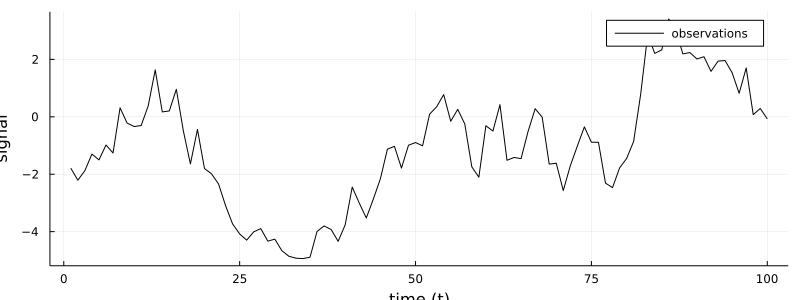

In [3]:
# Load previously generated signal
signal = load("util/signal.jld");

# Extract variables
T = signal["T"]
Y = signal["Y"]
γ = signal["γ"]

# Visualize data
plot(1:T, Y, color="black", label="observations", markersize=6, xlabel="time (t)", ylabel="signal", size=(800,300))

The data above is from a random walk, i.e. a process defined by the following equations:

$$\begin{align*}
x_k =&\ x_{k-1} + w_k \\
y_k =&\ x_k + v_k \, .
\end{align*}$$

The variables $w$ and $v$ are process noise and measurement noise respectively, with $w \sim \mathcal{N}(0, \tau^{-1})$ and $v \sim \mathcal{N}(0, \gamma^{-1})$. The parameter $\tau$ represents process noise _precision_ and the parameter $\gamma$ represents measurement noise _precision_. We do know the value of $\gamma$, but not of $\tau$. With Bayesian inference, we can simultaneously estimate the time-varying states and the time-invariant process noise precision. You need only to cast the equations to a generative model and pose a prior for the unknown variables.

### **1) Finish the model specification below.**

Add a variable `τ` with the prior for the process noise _precision_ and a variable `x_k` with the state transition distribution. Note that the prior for `τ` should contain two placeholders: `placeholder(:1)` and `placeholder(:τ2)`.

Remember to use `@RV var ~ ...` to define a variable distributed according to a desired distributon. Options include `GaussianMeanVariance`, `GaussianMeanPrecision`, `Gamma`, `Wishart`, `Beta`, `Bernoulli`, `Categorical` and `Dirichlet`.

In [4]:
# Initialize a graph
graph = FactorGraph()

# Define initial state prior
@RV x_kmin1 ~ GaussianMeanPrecision(placeholder(:m_x_kmin1), 
                                    placeholder(:w_x_kmin1))

### BEGIN SOLUTION
# Prior for process noise precision
@RV τ ~ Gamma(placeholder(:τ1), placeholder(:τ2))

# State transition
@RV x_k ~ GaussianMeanPrecision(x_kmin1, τ)
### END SOLUTION
    
# Observation likelihood
@RV y_k ~ GaussianMeanPrecision(x_k, γ)
    
# Tell FL that y is observed
placeholder(y_k, :y_k);

# Visualize subgraph
ForneyLab.draw(graph)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.43.0 (0)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 3470988427943986814 -->
 
 3470988427943986814 
 
 clamp_1 
 
<!-- 16869425721244858705 -->
 
 16869425721244858705 
 
 placeholder_τ1 
 
<!-- 13752788905811332439 -->
 
 13752788905811332439 
 
 Gam 
 gamma_1 
 
<!-- 13752788905811332439--16869425721244858705 -->
 
 13752788905811332439--16869425721244858705 
 
 τ1 
 1 out 
 2 a 
 
<!-- 9453757204815395183 -->
 
 9453757204815395183 
 
 placeholder_τ2 
 
<!-- 13752788905811332439--9453757204815395183 -->
 
 13752788905811332439--9453757204815395183 
 
 τ2 
 1 out 
 3 b 
 
<!-- 7160635658165272501 -->
 
 7160635658165272501 
 
 𝒩 
 gaussianmeanprecision_2 
 
<!-- 7160635658165272501--13752788905811332439 -->
 
 7160635658165272501--13752788905811332439 
 
 τ 
 1 out 
 3 w 
 
<!-- 12036840086089702895 -->
 
 12036840086089702895 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 7160635658165272501--12036840086089702895 -->
 
 7160635658165272501--12036840086089702895 
 
 x_kmin1 
 1 out 
 2 m 
 
<!-- 2000596336211653396 -->
 
 2000596336211653396 
 
 placeholder_m_x_kmin1 
 
<!-- 12036840086089702895--2000596336211653396 -->
 
 12036840086089702895--2000596336211653396 
 
 m_x_kmin1 
 1 out 
 2 m 
 
<!-- 804481886783760302 -->
 
 804481886783760302 
 
 placeholder_w_x_kmin1 
 
<!-- 12036840086089702895--804481886783760302 -->
 
 12036840086089702895--804481886783760302 
 
 w_x_kmin1 
 1 out 
 3 w 
 
<!-- 264801602049315570 -->
 
 264801602049315570 
 
 placeholder_y_k 
 
<!-- 15237548494260759592 -->
 
 15237548494260759592 
 
 𝒩 
 gaussianmeanprecision_3 
 
<!-- 264801602049315570--15237548494260759592 -->
 
 264801602049315570--15237548494260759592 
 
 y_k 
 1 out 
 1 out 
 
<!-- 15237548494260759592--3470988427943986814 -->
 
 15237548494260759592--3470988427943986814 
 
 clamp_1 
 1 out 
 3 w 
 
<!-- 15237548494260759592--7160635658165272501 -->
 
 15237548494260759592--7160635658165272501 
 
 x_k 
 1 out 
 2 m

In [5]:
# This cell checks the presence and format of the variable τ in your model (1 point)
@assert @isdefined(τ)
@assert typeof(τ) == Variable
### BEGIN HIDDEN TESTS
import ForneyLab: hasVariable
@assert hasVariable(graph, τ)
@assert haskey(graph.nodes, :gamma_1)
### END HIDDEN TESTS

In [6]:
# This cell checks the presence and format of the variable x_k in your model (1 point)
@assert @isdefined(x_k)
@assert typeof(x_k) == Variable
### BEGIN HIDDEN TESTS
import ForneyLab: hasVariable
@assert hasVariable(graph, x_k)
@assert haskey(graph.nodes, :gaussianmeanprecision_3)
### END HIDDEN TESTS

In [7]:
# This cell compiles an inference algorithm based on your model specification (3 points)
q = PosteriorFactorization(x_k, x_kmin1, τ, ids=[:x :x_kmin1 :τ])
algorithm = messagePassingAlgorithm()
source_code = algorithmSourceCode(algorithm)
eval(Meta.parse(source_code));

In [8]:
# SPOILER ALERT! 
# This script contains clues on specifying the model correctly.
# Do not look into it if you don't want the assignment spoiled!
include("util/run_inference.jl")

Your generated plot should look something like this:

![](figures/filtered_signal.png)